In [1]:
import sys ; sys.path.append('../')
import torch
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

from learn_KKL.luenberger_observer import LuenbergerObserver
from learn_KKL.system import QuanserQubeServo2
from learn_KKL.raffinement_dimN import *
import matplotlib.pyplot as plt

In [2]:
# Set up the system
system = QuanserQubeServo2()
# Instantiate the observer
observer = LuenbergerObserver(dim_x=4, dim_y=1, method='Supervised', recon_lambda=0.1, wc=4,
                              activation=torch.nn.SiLU())
observer.set_dynamics(system)
# Generate initial dataset
data,grid = observer.generate_data_svl(np.array([[-0.5, 0.5], [0., 1.], [-0.1, 0.1], [-0.1, 0.1]]), [10,10,5,5],
                                  method='adaptative')

C:\Users\pchauris\stage\dir2\repo\learn_observe_KKL\learn_KKL\raffinement_dimN.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  axes = np.array([np.arange(N[i]) for i in range(dim)])


In [3]:
data.shape

torch.Size([2500, 9])

In [4]:
X = data[:,0:4]
Z = data[:,4:9]

In [5]:
critere = Z[:,0]
data1,grid1 = observer.raffine_grid(grid,critere)

torch.Size([17500, 9])


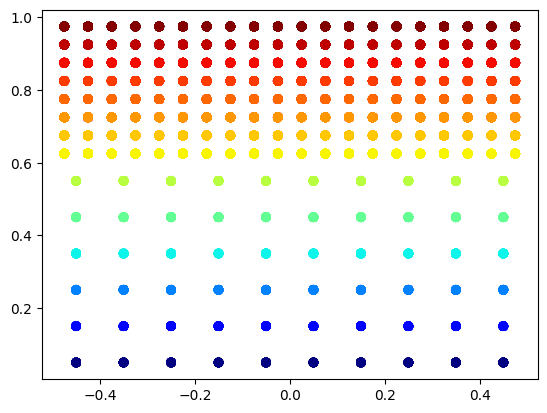

In [6]:
print(data1.shape)
plt.scatter(data1[:,0],data1[:,1],c=data1[:,5],cmap='jet')
plt.show()